<strong><b><font size="6">Importing Libraries</font></b></strong>

In [1]:
!pip3 install scikit-plot
!pip3 install -U scikit-learn scipy matplotlib
!pip3 install scikit-learn
!pip3 install -U scikit-learn scipy matplotlib
!pip3 install -U scikit-learn
!pip3 install sklearn
!pip3 install pandas
!pip3 install virtualenv
!pip3 install gensim
!pip3 install seaborn
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import string



#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc, 
                             mean_squared_error, log_loss, precision_recall_curve, classification_report, 
                             precision_recall_fscore_support,ConfusionMatrixDisplay)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron, PassiveAggressiveClassifier 
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import word2vec

from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Utility
from time import time

# Loading Data

In [3]:
df = pd.read_csv("Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
print("Data shape - ", df.shape, "\n") 
for col in df.columns:
    print("The number of null values - ", col, df[col].isnull().sum())

Data shape -  (14640, 15) 

The number of null values -  tweet_id 0
The number of null values -  airline_sentiment 0
The number of null values -  airline_sentiment_confidence 0
The number of null values -  negativereason 5462
The number of null values -  negativereason_confidence 4118
The number of null values -  airline 0
The number of null values -  airline_sentiment_gold 14600
The number of null values -  name 0
The number of null values -  negativereason_gold 14608
The number of null values -  retweet_count 0
The number of null values -  text 0
The number of null values -  tweet_coord 13621
The number of null values -  tweet_created 0
The number of null values -  tweet_location 4733
The number of null values -  user_timezone 4820


In [7]:
df["airline_sentiment"]= df["airline_sentiment"].str.lower()    
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Text Preprocessing

Diving the data into positive negative and neutral data frames :

In [8]:
df2_positive = df[df['airline_sentiment'] ==  "positive"]
df2_positive.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York


In [9]:
positive_review_list = df2_positive['text'].tolist()

In [10]:
df2_negative = df[df['airline_sentiment'] ==  "negative"]
df2_negative.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [11]:
negative_review_list = df2_negative['text'].tolist()

In [12]:
df2_neutral = df[df['airline_sentiment'] ==  "neutral"]
df2_neutral.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
10,570294189143031808,neutral,0.6769,NaN,0.0,Virgin America,NaN,idk_but_youtube,NaN,0,@VirginAmerica did you know that suicide is th...,NaN,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,@VirginAmerica will you be making BOS&gt;LAS n...,NaN,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada)


In [13]:
neutral_review_list = df2_neutral['text'].tolist()

# Lower case

In [14]:
df2_positive.text = df2_positive.text.apply(lambda x:x.lower())
df2_negative.text = df2_negative.text.apply(lambda x:x.lower())
df2_neutral.text = df2_neutral.text.apply(lambda x:x.lower())

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

### Punctuation removal

In [15]:
df2_neutral.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i didn't today... must mean i n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@virginamerica really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
10,570294189143031808,neutral,0.6769,NaN,0.0,Virgin America,NaN,idk_but_youtube,NaN,0,@virginamerica did you know that suicide is th...,NaN,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,@virginamerica will you be making bos&gt;las n...,NaN,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada)


In [16]:
!pip3 install emot
import string
import re
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
def preprocess(text):
    user_regex = '@[\w\-]+'
    res = re.sub(user_regex, '', str(text).lower())
    res = stem(res)
    return res

def stem(text):
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    tokens = text.split()
    stemmer = PorterStemmer()
    all_stopwords = stopwords.words('english')
    exclusions = ["rt" , "!"]
    all_stopwords.extend(exclusions)
    tokens = [stemmer.stem(token) for token in tokens if not token in set(all_stopwords)]
    res = ' '.join(tokens)
    return res

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text



In [17]:
df2_neutral['text'] = df.apply(lambda row: convert_emojis(row['text']), axis=1)
df2_positive['text'] = df.apply(lambda row: convert_emojis(row['text']), axis=1)
df2_negative['text'] = df.apply(lambda row: convert_emojis(row['text']), axis=1)


In [18]:
df2_neutral['text'] = df.apply(lambda row: preprocess(row['text']), axis=1)
df2_positive['text'] = df.apply(lambda row: preprocess(row['text']), axis=1)
df2_negative['text'] = df.apply(lambda row: preprocess(row['text']), axis=1)


In [19]:
df2_neutral.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didnt today must mean need take anoth trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,realli miss prime opportun men without hat par...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
10,570294189143031808,neutral,0.6769,NaN,0.0,Virgin America,NaN,idk_but_youtube,NaN,0,know suicid second lead caus death among teen ...,NaN,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,make bosgtla non stop perman anytim soon,NaN,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada)


In [20]:
df2_neutral.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didnt today must mean need take anoth trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,realli miss prime opportun men without hat par...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
10,570294189143031808,neutral,0.6769,NaN,0.0,Virgin America,NaN,idk_but_youtube,NaN,0,know suicid second lead caus death among teen ...,NaN,2015-02-24 10:48:24 -0800,1/1 loner squad,Eastern Time (US & Canada)
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,make bosgtla non stop perman anytim soon,NaN,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada)


In [21]:
df2_neutral.text[2].split()[0:5]

['didnt', 'today', 'must', 'mean', 'need']

In [22]:
df2_neutral.text

0                                                     said
2               didnt today must mean need take anoth trip
7        realli miss prime opportun men without hat par...
10       know suicid second lead caus death among teen ...
23                make bosgtla non stop perman anytim soon
                               ...                        
14607                                     need someon help
14611                      guarante retribut id glad share
14632    “ georg doesnt look good pleas follow link sta...
14637             pleas bring american airlin blackberry10
14639    8 ppl need 2 know mani seat next flight plz pu...
Name: text, Length: 3099, dtype: object

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [23]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

In [24]:
stop = stopwords.words('english')

In [25]:
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from tweets:__

In [27]:
df2_neutral.text = df2_neutral.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2_positive.text = df2_positive.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2_negative.text = df2_negative.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [28]:
df2_positive.text

1                        plu youv ad commerci experi tacki
6        ye nearli everi time fli vx “ear worm” won’t g...
8                                           well didnt…but
9                               amaz arriv hour earli good
11        lt3 pretti graphic much better minim iconographi
                               ...                        
14623    love new plane jfklax run mayb one day one ame...
14625    flight 236 great fantast cabin crew land thank...
14628    thank “ custom relat review concern contact ba...
14630                                                thank
14635                      thank got differ flight chicago
Name: text, Length: 2363, dtype: object

### Tokenize Text in Words

In [29]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

__Sentence Tokenizing:__

In [30]:
sent_tokenize(df2_positive.text[1])

['plu youv ad commerci experi tacki']

__Word Tokenizing:__

In [31]:
df2_positive['text_tokenized'] = df2_positive.text.apply(lambda x: word_tokenize(x))
df2_negative['text_tokenized'] = df2_negative.text.apply(lambda x: word_tokenize(x))
df2_neutral['text_tokenized'] = df2_neutral.text.apply(lambda x: word_tokenize(x))


In [32]:
df2_positive['text_tokenized'].head()

1              [plu, youv, ad, commerci, experi, tacki]
6     [ye, nearli, everi, time, fli, vx, “, ear, wor...
8                                     [well, didnt…but]
9                      [amaz, arriv, hour, earli, good]
11    [lt3, pretti, graphic, much, better, minim, ic...
Name: text_tokenized, dtype: object

### NLTK Word Stemming

In [34]:
df2_positive['text_stemmed'] = df2_positive.text_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])
df2_negative['text_stemmed'] = df2_negative.text_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])
df2_neutral['text_stemmed'] = df2_neutral.text_tokenized.apply(lambda x: [stemmer.stem(word) for word in x])


In [35]:
df2_positive.text_stemmed.head()

1              [plu, youv, ad, commerci, experi, tacki]
6     [ye, nearli, everi, time, fli, vx, “, ear, wor...
8                                     [well, didnt…but]
9                      [amaz, arriv, hour, earli, good]
11    [lt3, pretti, graphic, much, better, minim, ic...
Name: text_stemmed, dtype: object

### Lemmatizing Words Using [WordNet]

In [36]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

In [40]:
lemmatizer = WordNetLemmatizer()

In [41]:
df2_positive['text_lemmatized'] = df2_positive.text_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df2_neutral['text_lemmatized'] = df2_neutral.text_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df2_negative['text_lemmatized'] = df2_negative.text_tokenized.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [42]:
df2_positive.text_tokenized.head()

1              [plu, youv, ad, commerci, experi, tacki]
6     [ye, nearli, everi, time, fli, vx, “, ear, wor...
8                                     [well, didnt…but]
9                      [amaz, arriv, hour, earli, good]
11    [lt3, pretti, graphic, much, better, minim, ic...
Name: text_tokenized, dtype: object

In [43]:
df2_positive.text_lemmatized.head()

1              [plu, youv, ad, commerci, experi, tacki]
6     [ye, nearli, everi, time, fli, vx, “, ear, wor...
8                                     [well, didnt…but]
9                      [amaz, arriv, hour, earli, good]
11    [lt3, pretti, graphic, much, better, minim, ic...
Name: text_lemmatized, dtype: object

### Plotting Frequencies of Words

__Extract all words in a list:__

In [44]:
positive_review_list = df2_positive['text_lemmatized'].tolist()
negative_review_list = df2_negative['text_lemmatized'].tolist()
neutral_review_list = df2_neutral['text_lemmatized'].tolist()

In [45]:
positive_review_list = [item for sublist in positive_review_list for item in sublist]
negative_review_list = [item for sublist in negative_review_list for item in sublist]

In [46]:
print('Number of positive words',len(positive_review_list))

Number of positive words 17941


In [47]:
print('Number of negative words',len(negative_review_list))

Number of negative words 95778


In [48]:
print('Number of neutral words',len(neutral_review_list))

Number of neutral words 3099


In [49]:
all_words = positive_review_list + negative_review_list + neutral_review_list

In [50]:
print('Number of total words in corpus',len(all_words))

Number of total words in corpus 116818


In [51]:
all_words

['plu',
 'youv',
 'ad',
 'commerci',
 'experi',
 'tacki',
 'ye',
 'nearli',
 'everi',
 'time',
 'fli',
 'vx',
 '“',
 'ear',
 'worm',
 '”',
 'won',
 '’',
 't',
 'go',
 'away',
 'well',
 'didnt…but',
 'amaz',
 'arriv',
 'hour',
 'earli',
 'good',
 'lt3',
 'pretti',
 'graphic',
 'much',
 'better',
 'minim',
 'iconographi',
 'great',
 'deal',
 'alreadi',
 'think',
 '2nd',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 '1st',
 'trip',
 'yet',
 'p',
 'im',
 'fli',
 'fabul',
 'seduct',
 'sky',
 'u',
 'take',
 'stress',
 'away',
 'travel',
 'httptcoahlxhhkiyn',
 'thank',
 'excit',
 'first',
 'cross',
 'countri',
 'flight',
 'lax',
 'mco',
 'ive',
 'heard',
 'noth',
 'great',
 'thing',
 'virgin',
 'america',
 '29daystogo',
 '❤️',
 'fli',
 '☺️👍',
 'know',
 'would',
 'amazingli',
 'awesom',
 'bosfll',
 'plea',
 'want',
 'fli',
 'love',
 'graphic',
 'httptcout5grrwaaa',
 'love',
 'hipster',
 'innov',
 'feel',
 'good',
 'brand',
 'great',
 'news',
 'america',
 'could',
 'start',
 'flight',
 'hawaii

__Initialize word frequency counter:__

In [52]:
word_counter = {}
for word in all_words:
    token = str(word)
    if token in word_counter:
        word_counter[token] += 1
    else:
        word_counter[token] = 1

In [53]:
word_counter

{'plu': 46,
 'youv': 53,
 'ad': 39,
 'commerci': 12,
 'experi': 210,
 'tacki': 1,
 'ye': 189,
 'nearli': 13,
 'everi': 106,
 'time': 853,
 'fli': 538,
 'vx': 5,
 '“': 89,
 'ear': 3,
 'worm': 1,
 '”': 91,
 'won': 7,
 '’': 116,
 't': 44,
 'go': 507,
 'away': 60,
 'well': 176,
 'didnt…but': 1,
 'amaz': 95,
 'arriv': 162,
 'hour': 1101,
 'earli': 86,
 'good': 256,
 'lt3': 14,
 'pretti': 39,
 'graphic': 2,
 'much': 204,
 'better': 169,
 'minim': 1,
 'iconographi': 1,
 'great': 314,
 'deal': 70,
 'alreadi': 148,
 'think': 132,
 '2nd': 40,
 'trip': 182,
 'amp': 550,
 'havent': 86,
 'even': 292,
 'gone': 25,
 '1st': 73,
 'yet': 129,
 'p': 12,
 'im': 610,
 'fabul': 8,
 'seduct': 1,
 'sky': 20,
 'u': 861,
 'take': 316,
 'stress': 20,
 'travel': 270,
 'httptcoahlxhhkiyn': 1,
 'thank': 1464,
 'excit': 26,
 'first': 208,
 'cross': 29,
 'countri': 28,
 'flight': 3995,
 'lax': 90,
 'mco': 27,
 'ive': 303,
 'heard': 48,
 'noth': 143,
 'thing': 112,
 'virgin': 18,
 'america': 13,
 '29daystogo': 1,
 '❤️

In [68]:
sorted_word_counts = sorted(word_counter.items(), key=lambda x:x[1], reverse=True)
sorted_word_counts

[('flight', 3995),
 ('thank', 1464),
 ('get', 1343),
 ('hour', 1101),
 ('cancel', 958),
 ('delay', 933),
 ('servic', 927),
 ('custom', 897),
 ('help', 871),
 ('u', 861),
 ('time', 853),
 ('call', 715),
 ('wait', 713),
 ('bag', 696),
 ('hold', 656),
 ('plane', 649),
 ('im', 610),
 ('2', 588),
 ('amp', 550),
 ('fli', 538),
 ('still', 520),
 ('cant', 517),
 ('tri', 513),
 ('go', 507),
 ('need', 500),
 ('airlin', 498),
 ('day', 498),
 ('one', 495),
 ('gate', 491),
 ('flightl', 472),
 ('back', 447),
 ('dont', 427),
 ('would', 426),
 ('seat', 424),
 ('phone', 413),
 ('make', 411),
 ('got', 408),
 ('agent', 402),
 ('late', 396),
 ('plea', 380),
 ('miss', 379),
 ('book', 376),
 ('guy', 372),
 ('like', 366),
 ('work', 362),
 ('chang', 351),
 ('today', 347),
 ('check', 338),
 ('minut', 322),
 ('take', 316),
 ('great', 314),
 ('ive', 303),
 ('never', 300),
 ('airport', 299),
 ('board', 296),
 ('min', 295),
 ('even', 292),
 ('3', 292),
 ('know', 288),
 ('hr', 285),
 ('realli', 280),
 ('say', 279),

In [80]:
most_common_words = sorted_word_counts[0:10]
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'freq']


In [81]:
most_common_words

,word,freq
0,flight,3995
1,thank,1464
2,get,1343
3,hour,1101
4,cancel,958
5,delay,933
6,servic,927
7,custom,897
8,help,871
9,u,861


<AxesSubplot: ylabel='word'>

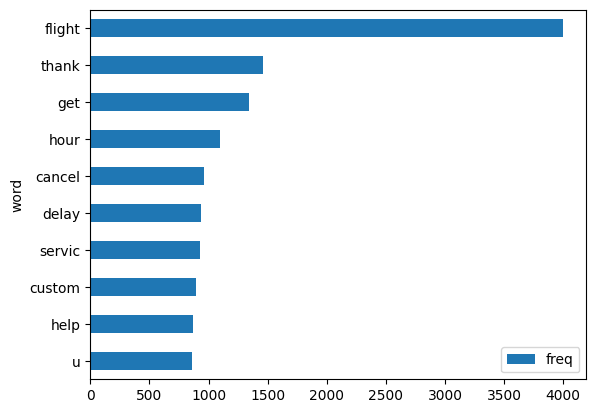

In [82]:
most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')

__Pick top 10 most common words:__

__Sort the word counts and plot their values on Logarithmic axes to check the shape of the distribution:__
- This visualization is particularly useful if comparing 2 or more datasets
- A flatter distribution indicates a large vocabulary while a peaked distribution a restricted vocabulary often due to a focused topic or specialized language.

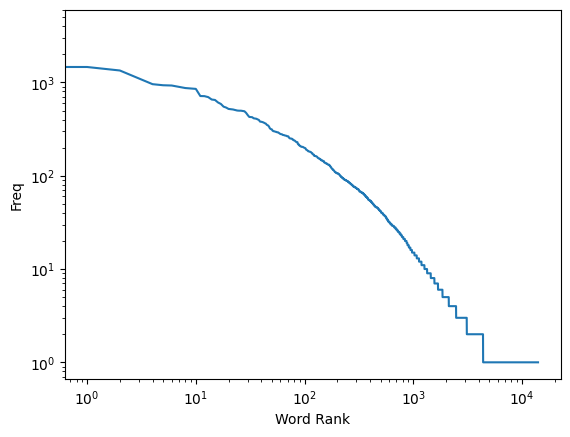

In [57]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

__Histogram of sorted_word_counts:__
- Displays how many words have a count in a specific range.
- The distribution is highly peaked at low counts, i.e. most of the words appear which a low count, so we better display it on semilogarithmic axes to inspect the tail of the distribution.

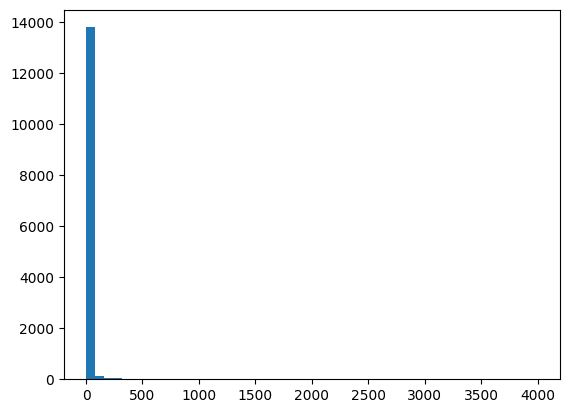

In [58]:
plt.hist(sorted_word_counts, bins=50);

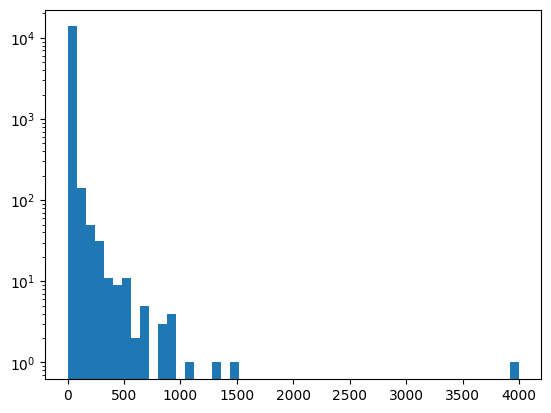

In [59]:
plt.hist(sorted_word_counts, bins=50, log=True);

__Word length comparison of positive and negative reviews:__

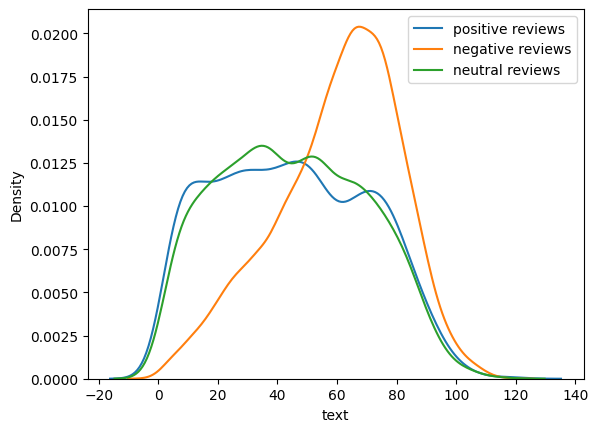

In [61]:
sns.distplot(df2_positive['text'].apply(lambda y: len(y)), label='positive reviews',hist=False)
sns.distplot(df2_negative['text'].apply(lambda y: len(y)), label='negative reviews',hist=False)
sns.distplot(df2_neutral['text'].apply(lambda y: len(y)), label='neutral reviews',hist=False)
plt.legend()
plt.show()

### Removing frequent unimportant words

In [90]:
sorted_word_counts[:3]

[('flight', 3995), ('thank', 1464), ('get', 1343)]

In [ ]:
remove = most_common_words.word.tolist()[:3]
remove

In [ ]:
negative_features['review_lemmatized'] = negative_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])
positive_features['review_lemmatized'] = positive_features['review_lemmatized'].apply(lambda x: [y for y in x if y not in remove])

###  bag-of-words Naive Bayes model


In [92]:
df2_positive['text_lemmatized_train'] = df2_positive.text_lemmatized.apply(lambda x: ' '.join(x))
df2_negative['text_lemmatized_train'] = df2_negative.text_lemmatized.apply(lambda x: ' '.join(x))
df2_neutral['text_lemmatized_train'] = df2_neutral.text_lemmatized.apply(lambda x: ' '.join(x))

__Defining Target and Feature variables:__

In [93]:
x = (df2_positive['text_lemmatized_train'].append(df2_negative['text_lemmatized_train'].append(df2_neutral['text_lemmatized_train'])))
y = (df2_positive['airline_sentiment'].append(df2_negative['airline_sentiment'].append(df2_neutral['airline_sentiment'])))

__Label Encoding Target Variable:__

In [94]:
le = preprocessing.LabelEncoder()
le.fit(y)

list(le.classes_)

['negative', 'neutral', 'positive']

In [95]:
y = le.transform(y) 

In [96]:
print('Labels for \'{}\' are \'{}\' respectively.'.format(le.inverse_transform(np.unique(y)),np.unique(y)))

Labels for '['negative' 'neutral' 'positive']' are '[0 1 2]' respectively.


__Bag of Words using CountVectorizer:__


In [101]:
bow = CountVectorizer(max_features=25000, lowercase=True,analyzer = "word")
train_bow_neg = bow.fit_transform(x)
train_bow_neg

<14640x12998 sparse matrix of type '<class 'numpy.int64'>'
	with 128614 stored elements in Compressed Sparse Row format>

In [102]:
train_bow_neg.toarray().shape

(14640, 12998)

In [103]:
train_bow_neg.toarray()[1:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
vocab = bow.get_feature_names_out()

In [105]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_bow_neg.toarray(), axis=0)

word_freq = pd.DataFrame({'word':vocab,'freq':dist})

In [106]:
word_freq.head()

,word,freq
0,00,1
1,0011,1
2,0016,3
3,006,1
4,0162389030167,1


In [107]:
word_freq.sort_values(by='freq',ascending=False)[:10]

,word,freq
4926,flight,4786
11461,thank,1688
5339,get,1615
5896,hour,1133
3070,cancel,1056
5720,help,1039
10574,servic,989
3951,delay,978
11611,time,960
3774,custom,935


__Splitting into Train and test datasets:__

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split \
                (train_bow_neg.toarray(), y,test_size=0.3, \
                random_state=1000)


In [124]:
print ("No. of True Cases in training data set for" , ytrain.sum())
print ("No. of True Cases in testing data set for",ytest.sum())

print ("Ratio of True Cases in training data set: " , round(ytrain.sum()/len(ytrain),2))
print ("Ratio of True Cases in testing data set: ", round(ytest.sum()/len(ytest),2))

No. of True Cases in training data set for 5529
No. of True Cases in testing data set for 2296
Ratio of True Cases in training data set:  0.54
Ratio of True Cases in testing data set:  0.52


In [125]:
xtrain.shape

(10248, 12998)

In [126]:
train_bow_neg

<14640x12998 sparse matrix of type '<class 'numpy.int64'>'
	with 128614 stored elements in Compressed Sparse Row format>

In [127]:
print( "Training the multinomial Naive Bayes Classifier")

# Initialize a Random Forest classifier with 100 trees
NB = MultinomialNB() 

# This may take a few minutes to run
NB_clf = NB.fit( xtrain, ytrain )

Training the multinomial Naive Bayes Classifier


In [128]:
prob_test  = NB.predict_proba(xtest)
prob_train = NB.predict_proba(xtrain)

#Probability Threshold = 0.5 (default) 
pred_test  = NB.predict(xtest)
pred_train = NB.predict(xtrain)

In [129]:
#Calculate train and test accuracy
train_acc = accuracy_score(ytrain, pred_train)
test_acc  = accuracy_score(ytest, pred_test)
print ("Train Accuracy :: ", train_acc)
print ("Test Accuracy :: ", test_acc)

Train Accuracy ::  0.839968774395004
Test Accuracy ::  0.7616120218579235



 Confusion matrix: 



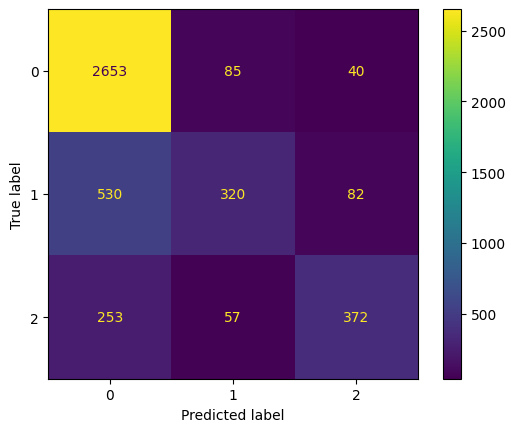

In [116]:
print ("\n Confusion matrix: \n")
cm= confusion_matrix(ytest, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Comparision with other models

In [146]:
xtrain, xtest, ytrain, ytest = train_test_split \
                (df.text, df['airline_sentiment'],test_size=0.25, \
                random_state=1000)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)


(10980,) (10980,)
(3660,) (3660,)


In [147]:
#@title
#List of classes
SentimentLabels = ["NEGATIVE","POSITIVE"]

# Define classifiers
CLF = {} # dictionary of classifiers; modify as desired
CLF["Logistic Regression"] = LogisticRegression(max_iter=1000, C=1.6)
CLF["SGDClassifier L1"] = SGDClassifier(max_iter=1000, alpha=1e-5, penalty="l1")
CLF["SGDClassifier L2"] = SGDClassifier(max_iter=1000, alpha=1e-5, penalty="l2")
CLF["SGD Elastic-Net Penalty"] = SGDClassifier(max_iter=1000, alpha=1e-5, penalty="elasticnet")
CLF["Ridge Classifier"] = RidgeClassifier(tol=1e-2, solver="sag", max_iter=1000)
CLF["Perceptron"] = Perceptron(max_iter=1000)
CLF["Passive-Aggressive"] = PassiveAggressiveClassifier(max_iter=1000)
CLF["MultinomialNB"] = MultinomialNB(alpha=.01)
CLF["Bernoulli NB"] = BernoulliNB(alpha=.01)
CLF["Complement NB"] = ComplementNB(alpha=.1)

print("Available classifiers:")
for c in CLF:
    print("- ", c)
    
def train_eval_model(c, X_train, y_train, X_test, y_test):
    """Returns accuracy metrics and times"""
    
    def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, fontsize=30)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
        plt.yticks(tick_marks, classes, fontsize=22)

        fmt = '.2f'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label', fontsize=25)
        plt.xlabel('Predicted label', fontsize=25)
    
    def pred(): # predict with trained model
        t0 = time()
        pTrain, pTest = model.predict(X_train), model.predict(X_test)
        t = time() - t0 # time to predict validation and test examples
        return t, pTrain, pTest

    def evalModel():
        accV = accuracy_score(y_train, pTrain)
        print("Training: Accuracy=%4.3f" %(accV))
        print(classification_report(y_train, pTrain))
        accT = accuracy_score(y_test, pTest)
        print("Test: Accuracy=%4.3f" %(accT))
        print(classification_report(y_test, pTest))

    model_name = CLF[c]
    print(model_name)
    model = make_pipeline(CountVectorizer(ngram_range=(1,3)), model_name).fit(X_train, y_train)
    
    t0 = time()
    model.fit(X_train, y_train) # train
    time_train = time() - t0
    print("Training time = %4.2f" %time_train)
    CLF[c] = model # trained model
    t, pTrain, pTest = pred()
    print("Validation and Test time = %4.2f" %t)
    evalModel()
    print("Confusion matrix")
    cnf_matrix=confusion_matrix(y_test, pTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.show()

Available classifiers:
-  Logistic Regression
-  SGDClassifier L1
-  SGDClassifier L2
-  SGD Elastic-Net Penalty
-  Ridge Classifier
-  Perceptron
-  Passive-Aggressive
-  MultinomialNB
-  Bernoulli NB
-  Complement NB


LogisticRegression(C=1.6, max_iter=1000)
Training time = 14.28
Validation and Test time = 0.69
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.812
              precision    recall  f1-score   support

    negative       0.86      0.91      0.89      2334
     neutral       0.67      0.62      0.65       766
    positive       0.77      0.65      0.70       560

    accuracy                           0.81      3660
   macro avg       0.77      0.73      0.75      3660
weighted avg       0.81      0.81      0.81      3660

Confusion matrix


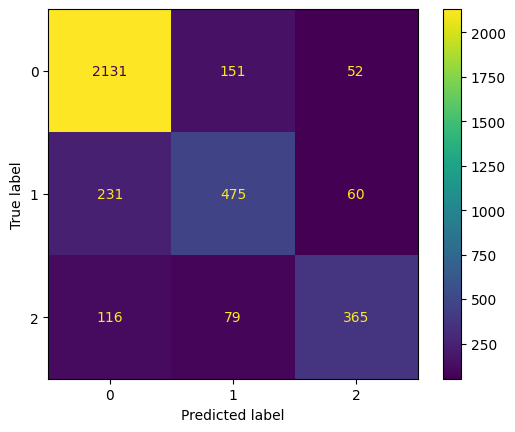

________________________________________________________________________________
________________________________________________________________________________
SGDClassifier(alpha=1e-05, penalty='l1')
Training time = 1.45
Validation and Test time = 0.62
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.801
              precision    recall  f1-score   support

    negative       0.86      0.91      0.88      2334
     neutral       0.66      0.58      0.62       766
    positive       0.70      0.67      0.68       560

    accuracy                           0.80      3660
   macro avg       0.74      0.72      0.73  

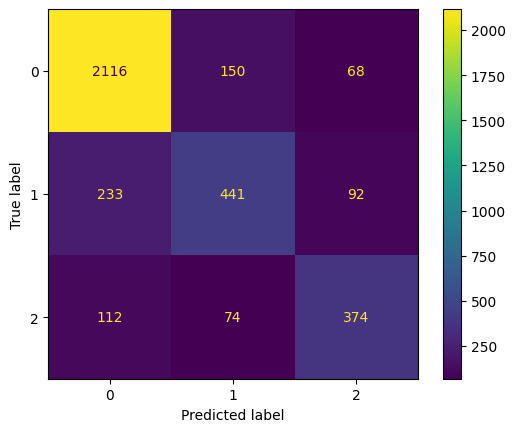

________________________________________________________________________________
________________________________________________________________________________
SGDClassifier(alpha=1e-05)
Training time = 1.20
Validation and Test time = 0.63
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.803
              precision    recall  f1-score   support

    negative       0.84      0.93      0.88      2334
     neutral       0.69      0.55      0.61       766
    positive       0.76      0.64      0.69       560

    accuracy                           0.80      3660
   macro avg       0.76      0.70      0.73      3660
weigh

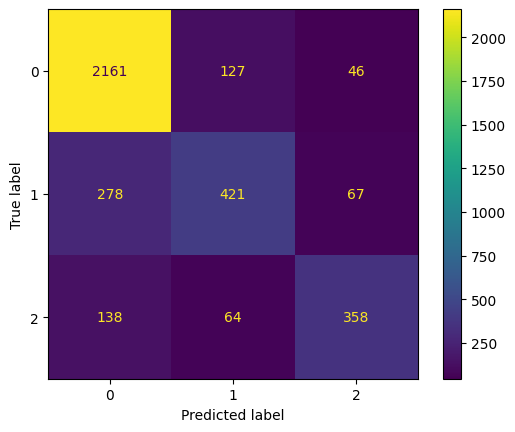

________________________________________________________________________________
________________________________________________________________________________
SGDClassifier(alpha=1e-05, penalty='elasticnet')
Training time = 1.59
Validation and Test time = 0.63
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.812
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89      2334
     neutral       0.66      0.61      0.64       766
    positive       0.76      0.68      0.72       560

    accuracy                           0.81      3660
   macro avg       0.76      0.73    

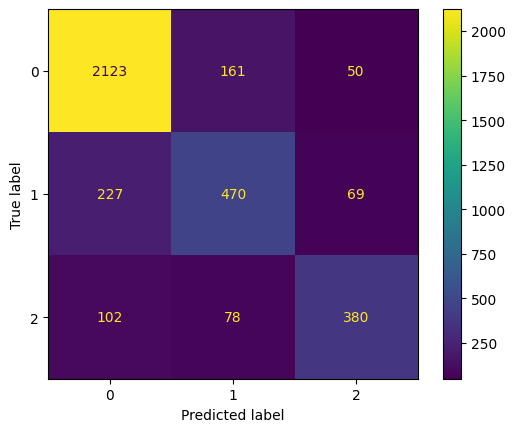

________________________________________________________________________________
________________________________________________________________________________
RidgeClassifier(max_iter=1000, solver='sag', tol=0.01)
Training time = 2.80
Validation and Test time = 0.68
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.797
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2334
     neutral       0.63      0.60      0.62       766
    positive       0.72      0.66      0.69       560

    accuracy                           0.80      3660
   macro avg       0.74      0.

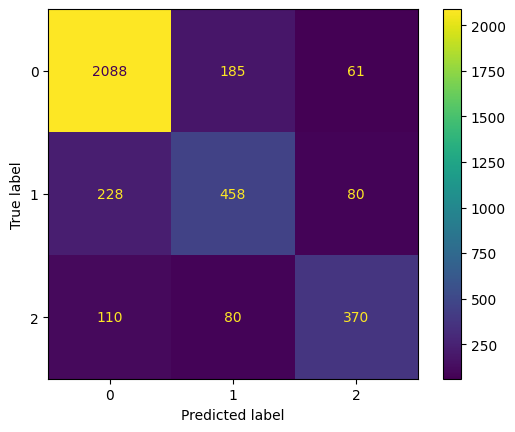

________________________________________________________________________________
________________________________________________________________________________
Perceptron()
Training time = 1.07
Validation and Test time = 0.59
Training: Accuracy=0.997
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       0.99      1.00      0.99      2333
    positive       0.99      0.99      0.99      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.805
              precision    recall  f1-score   support

    negative       0.85      0.92      0.88      2334
     neutral       0.68      0.57      0.62       766
    positive       0.72      0.66      0.69       560

    accuracy                           0.81      3660
   macro avg       0.75      0.72      0.73      3660
weighted avg       

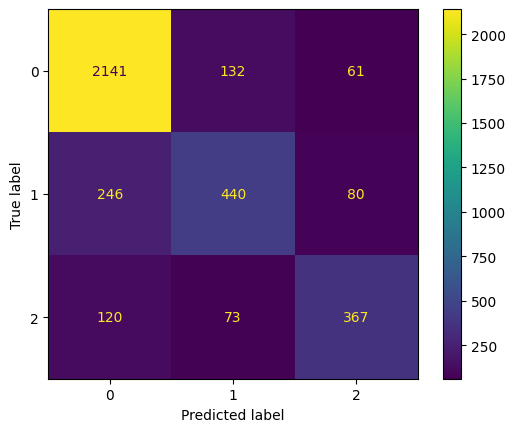

________________________________________________________________________________
________________________________________________________________________________
PassiveAggressiveClassifier()
Training time = 1.24
Validation and Test time = 0.59
Training: Accuracy=0.998
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      6844
     neutral       1.00      0.99      1.00      2333
    positive       0.99      1.00      1.00      1803

    accuracy                           1.00     10980
   macro avg       1.00      1.00      1.00     10980
weighted avg       1.00      1.00      1.00     10980

Test: Accuracy=0.799
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2334
     neutral       0.64      0.60      0.62       766
    positive       0.73      0.68      0.70       560

    accuracy                           0.80      3660
   macro avg       0.74      0.72      0.73      3660
we

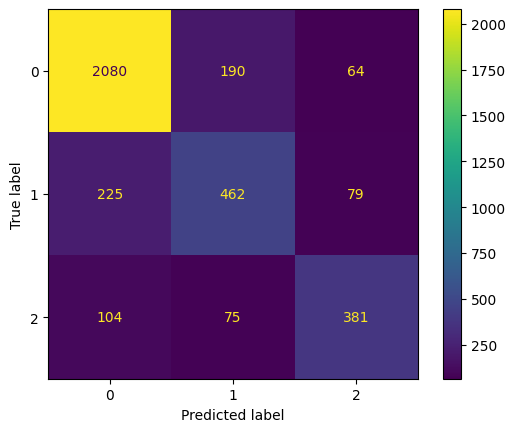

________________________________________________________________________________
________________________________________________________________________________
MultinomialNB(alpha=0.01)
Training time = 1.12
Validation and Test time = 0.64
Training: Accuracy=0.994
              precision    recall  f1-score   support

    negative       1.00      0.99      1.00      6844
     neutral       0.99      0.99      0.99      2333
    positive       0.98      1.00      0.99      1803

    accuracy                           0.99     10980
   macro avg       0.99      0.99      0.99     10980
weighted avg       0.99      0.99      0.99     10980

Test: Accuracy=0.796
              precision    recall  f1-score   support

    negative       0.83      0.93      0.88      2334
     neutral       0.69      0.49      0.58       766
    positive       0.71      0.65      0.68       560

    accuracy                           0.80      3660
   macro avg       0.75      0.69      0.71      3660
weight

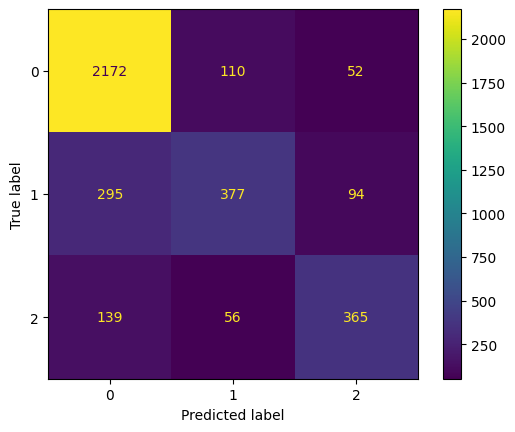

________________________________________________________________________________
________________________________________________________________________________
BernoulliNB(alpha=0.01)
Training time = 1.03
Validation and Test time = 0.65
Training: Accuracy=0.990
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      6844
     neutral       0.98      0.99      0.98      2333
    positive       0.97      1.00      0.98      1803

    accuracy                           0.99     10980
   macro avg       0.98      0.99      0.99     10980
weighted avg       0.99      0.99      0.99     10980

Test: Accuracy=0.783
              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      2334
     neutral       0.62      0.57      0.60       766
    positive       0.61      0.72      0.66       560

    accuracy                           0.78      3660
   macro avg       0.71      0.72      0.71      3660
weighted

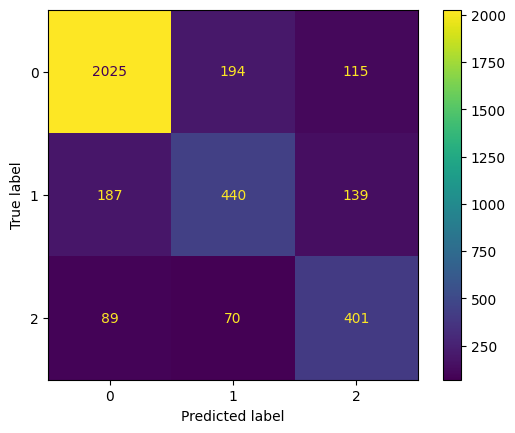

________________________________________________________________________________
________________________________________________________________________________
ComplementNB(alpha=0.1)
Training time = 1.04
Validation and Test time = 0.59
Training: Accuracy=0.993
              precision    recall  f1-score   support

    negative       1.00      0.99      1.00      6844
     neutral       0.98      0.99      0.99      2333
    positive       0.99      1.00      0.99      1803

    accuracy                           0.99     10980
   macro avg       0.99      0.99      0.99     10980
weighted avg       0.99      0.99      0.99     10980

Test: Accuracy=0.802
              precision    recall  f1-score   support

    negative       0.85      0.92      0.89      2334
     neutral       0.70      0.51      0.59       766
    positive       0.68      0.69      0.69       560

    accuracy                           0.80      3660
   macro avg       0.75      0.71      0.72      3660
weighted

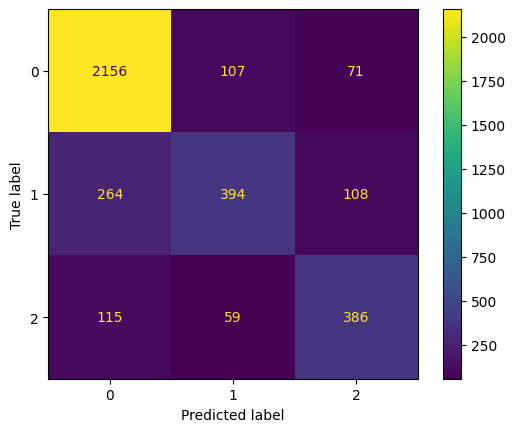

________________________________________________________________________________
________________________________________________________________________________


In [148]:
for c in CLF:
    train_eval_model(c, xtrain, ytrain, xtest,ytest)
    print('_' * 80)
    print('_' * 80)
    
   